In [4]:
import numpy as np
from matplotlib import pyplot as plt
import imageio


In [5]:
img = imageio.imread('tireRotation_01.png')
img.shape

(420, 560, 3)

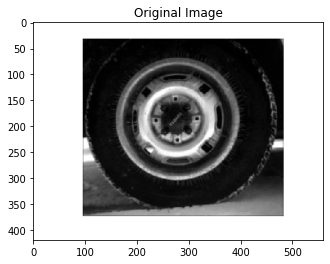

In [6]:
#To display image before equalization
plt.imshow(img)
plt.title('Original Image')
plt.show()


In [7]:
a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)

height=img.shape[0]
width=img.shape[1]
#finding histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1

print(a) 

[1319. 2048. 2048. 2048. 2048. 2048. 2048. 2048. 2048. 2048. 2048. 2048.
 2048. 2048. 2048. 2048. 2048. 2027. 1573. 1249. 1135. 1045.  883.  803.
  896.  885.  759.  756.  749.  718.  733.  633.  626.  598.  626.  647.
  588.  490.  510.  582.  526.  490.  494.  417.  379.  411.  490.  463.
  342.  392.  389.  408.  399.  406.  468.  409.  360.  420.  440.  507.
  352.  476.  447.  415.  419.  429.  423.  507.  495.  507.  474.  513.
  532.  504.  456.  412.  491.  478.  394.  435.  389.  468.  398.  348.
  364.  319.  358.  294.  370.  302.  310.  280.  275.  300.  347.  365.
  340.  366.  304.  325.  290.  361.  310.  347.  309.  353.  317.  339.
  368.  334.  320.  312.  284.  239.  314.  256.  318.  293.  299.  326.
  286.  271.  261.  328.  271.  284.  336.  292.  304.  299.  349.  275.
  298.  301.  320.  309.  280.  319.  294.  290.  262.  302.  302.  213.
  227.  263.  265.  280.  252.  283.  269.  272.  264.  273.  267.  241.
  288.  207.  261.  238.  246.  262.  275.  281.  2

In [8]:
#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

# b now contains the equalized histogram
b=b.astype(np.uint8)

print(b)

[  1   4   6   8  10  13  15  17  19  21  24  26  28  30  33  35  37  39
  41  42  43  45  46  46  47  48  49  50  51  52  52  53  54  54  55  56
  56  57  58  58  59  59  60  60  61  61  62  62  62  63  63  64  64  65
  65  66  66  66  67  67  68  68  69  69  70  70  71  71  72  72  73  73
  74  74  75  75  76  76  77  77  78  78  79  79  80  80  80  81  81  81
  82  82  82  82  83  83  84  84  84  85  85  85  86  86  86  87  87  87
  88  88  89  89  89  89  90  90  90  91  91  91  92  92  92  93  93  93
  94  94  94  95  95  95  96  96  96  97  97  97  98  98  98  99  99  99
  99 100 100 100 101 101 101 101 102 102 102 103 103 103 104 104 104 104
 105 105 105 105 106 106 106 106 107 107 107 107 107 108 108 108 108 108
 108 108 109 109 109 109 109 109 109 109 109 110 110 110 110 110 110 110
 110 111 111 111 111 111 111 111 111 111 111 112 112 112 112 112 112 112
 112 112 112 113 113 113 113 113 113 113 113 113 113 113 113 113 114 114
 114 114 114 114 114 114 114 114 114 114 114 114 11

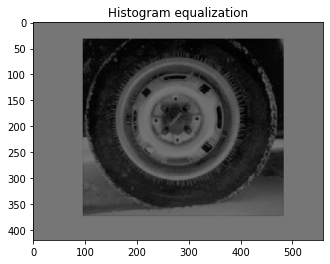

In [9]:
#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]

plt.imshow(img)
plt.title('Histogram equalization')
plt.show()
